# Análise de Instâncias do Problema de Embarque Remoto

Este notebook realiza uma análise detalhada das diferentes instâncias do problema de otimização do serviço de embarque remoto em aeroportos.

## Objetivo

O objetivo deste notebook é:
- Carregar e analisar as instâncias de dados (pequena, média, grande e rush)
- Visualizar o layout dos aeroportos para cada instância
- Examinar as janelas de tempo das requisições
- Comparar as características das diferentes instâncias

## Modelo Operacional: Desembarque → Turnaround → Embarque

As instâncias agora seguem um modelo realístico de operação aeroportuária onde **cada voo tem duas fases**:

### Fase 1: Desembarque (Aeronave → Portão)
- Passageiros chegam ao aeroporto
- Ônibus transportam da aeronave para o portão de embarque
- Tempo total: 25 minutos dependendo do número de passageiros
- Múltiplas requisições de ônibus conforme necessário

### Fase 2: Turnaround (Preparação da Aeronave)
- Limpeza da aeronave
- Abastecimento
- Checagens de segurança
- Tempo: 15-30 minutos

### Fase 3: Embarque (Portão → Aeronave)
- Novos passageiros embarcam
- Ônibus transportam do portão para a aeronave
- Tempo total: 50 minutos
- Número de passageiros pode ser diferente do desembarque

## Estrutura das Instâncias

Cada instância contém:
- **Número de requisições**: Total de desembarques + embarques
- **Número de ônibus**: Veículos disponíveis para atender as requisições
- **Coordenadas dos pontos**: Localização de portões, aeronaves e garagem
- **Janelas de tempo**: Períodos coordenados com as fases do voo
- **Distâncias e tempos**: Matrizes de distância e tempo de serviço
- **Detalhes dos voos**: Informações completas sobre desembarque, turnaround e embarque
- **Tempo máximo por viagem**: Limite temporal (em vez de distância máxima)

## 1. Importação das Funções Utilitárias

Primeiro, importamos todas as funções necessárias do módulo `utils.py`. Este módulo contém:

- `carregar_instancia()`: Carrega dados de uma instância a partir de um arquivo JSON
- `analisar_instancia()`: Realiza análise estatística detalhada de uma instância
- `visualizar_layout_aeroporto()`: Cria gráfico do layout físico do aeroporto
- `visualizar_janelas_tempo()`: Visualiza as janelas de tempo das requisições

In [46]:
from utils import *

## 2. Análise da Instância "Pequena"

A instância **pequena** representa um cenário de operação reduzida do aeroporto, ideal para:
- Testes iniciais do algoritmo
- Validação da modelagem matemática
- Compreensão dos padrões básicos do problema

Esta instância inclui **desembarques seguidos de embarques** para cada voo, modelando realisticamente o fluxo de passageiros.


=== ANÁLISE DA INSTÂNCIA: PEQUENA ===
Número de requisições: 14
Número de ônibus: 3
Máximo de viagens por ônibus: 5
Capacidade total de viagens: 15
Utilização estimada: 93.3%
Tempo máximo por viagem: 60.0 min

Número de voos: 2
Passageiros em desembarque: 329
Passageiros em embarque: 377
Total de passageiros: 706
Requisições de desembarque: 7
Requisições de embarque: 7
Média de passageiros por voo (desembarque): 164.5
Média de passageiros por voo (embarque): 188.5
Tempo médio de turnaround: 30.0 min
Janela de tempo mais cedo: 12.0 min
Janela de tempo mais tarde: 225.0 min
Duração total da operação: 213.0 min
Distância média entre requisições: 2310.12m
Distância máxima entre requisições: 3391.80m
Distância mínima entre requisições: 897.81m
Tempo de serviço médio: 5.66 min
Tempo de reabastecimento (garagem): 10.00 min


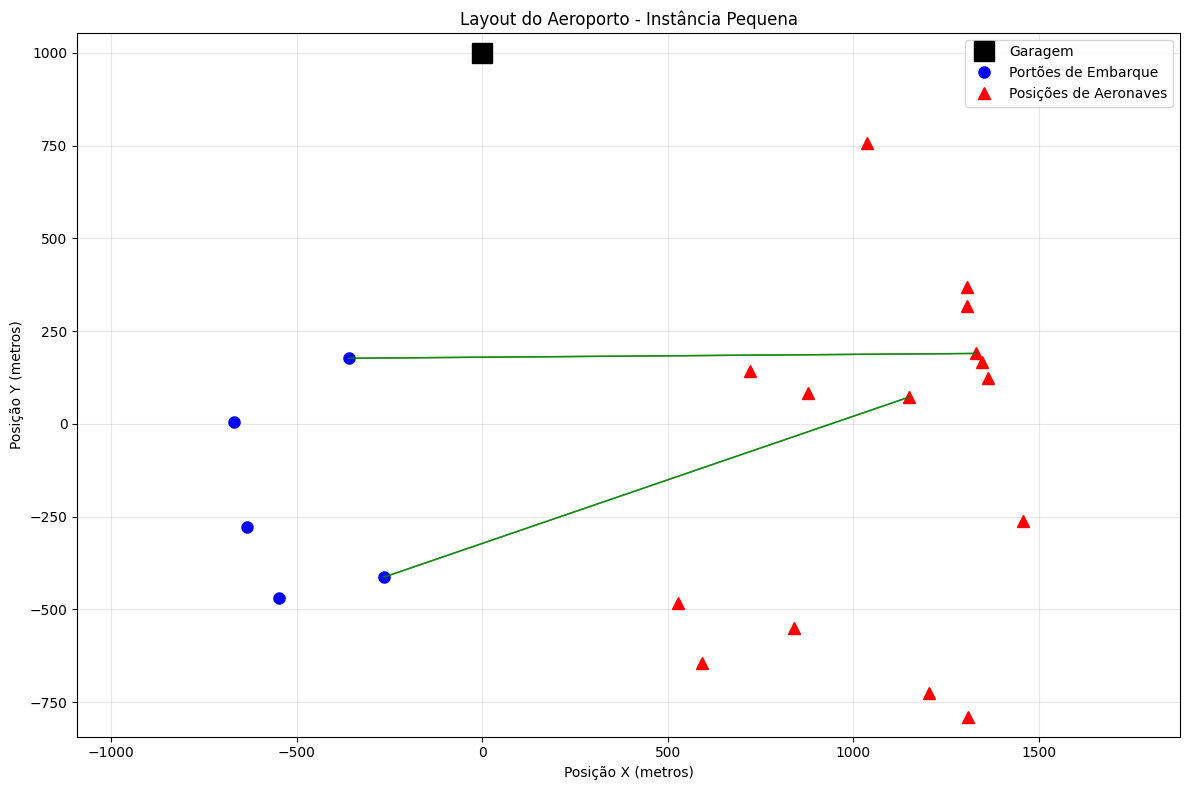

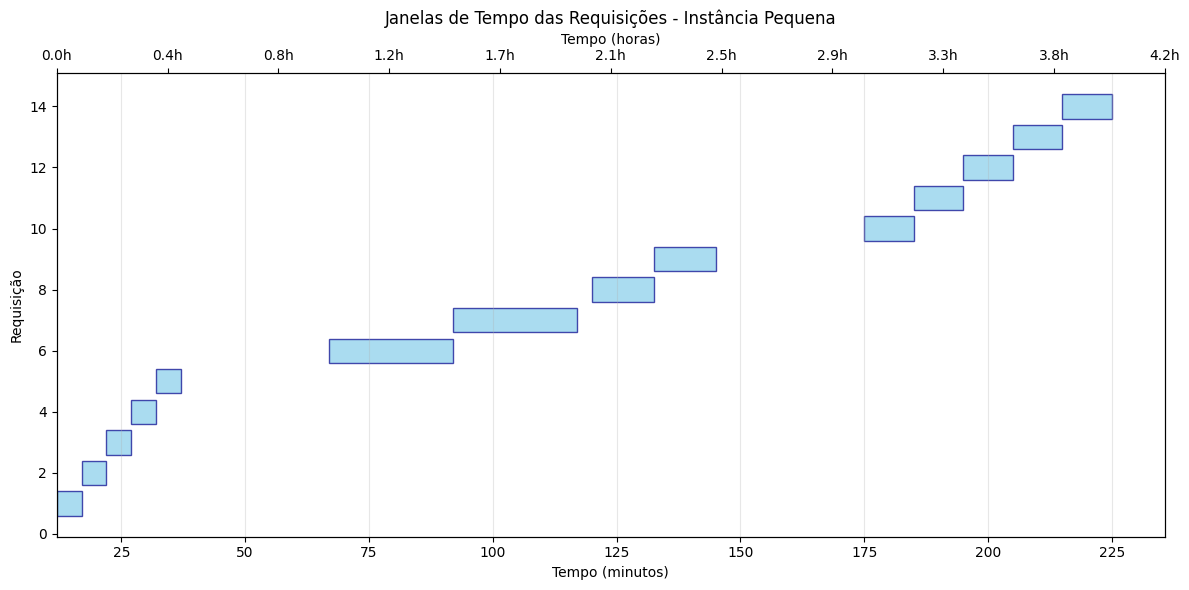

In [47]:
# Define qual instância será analisada
instancia = 'pequena'

# Constrói o caminho para o arquivo de dados da instância
arquivo = f'./dados/{instancia}.json'

# Carrega os dados da instância do arquivo JSON
dados = carregar_instancia(arquivo)

# Realiza análise estatística detalhada e exibe relatório
analise = analisar_instancia(dados, instancia)

# Gera visualização do layout físico do aeroporto
# Mostra posições dos portões, aeronaves, garagem e conexões entre requisições
visualizar_layout_aeroporto(dados, instancia)

# Cria gráfico das janelas de tempo para todas as requisições
# Permite visualizar a distribuição temporal das operações
visualizar_janelas_tempo(dados, instancia)

## 3. Análise da Instância "Média"

A instância **média** representa um cenário de operação moderada do aeroporto, caracterizada por um maior número de voos com suas respectivas operações de desembarque e embarque.

Esta instância é útil para:
- Avaliar o desempenho do algoritmo em cenários intermediários
- Identificar gargalos operacionais no modelo desembarque-turnaround-embarque
- Testar estratégias de otimização mais elaboradas
- Analisar a coordenação temporal entre fases dos voos


=== ANÁLISE DA INSTÂNCIA: MEDIA ===
Número de requisições: 67
Número de ônibus: 6
Máximo de viagens por ônibus: 12
Capacidade total de viagens: 72
Utilização estimada: 93.1%
Tempo máximo por viagem: 60.0 min

Número de voos: 10
Passageiros em desembarque: 1778
Passageiros em embarque: 1521
Total de passageiros: 3299
Requisições de desembarque: 36
Requisições de embarque: 31
Média de passageiros por voo (desembarque): 177.8
Média de passageiros por voo (embarque): 152.1
Tempo médio de turnaround: 28.8 min
Janela de tempo mais cedo: 12.0 min
Janela de tempo mais tarde: 533.9 min
Duração total da operação: 521.9 min
Distância média entre requisições: 2514.04m
Distância máxima entre requisições: 3986.48m
Distância mínima entre requisições: 703.99m
Tempo de serviço médio: 5.68 min
Tempo de reabastecimento (garagem): 10.00 min


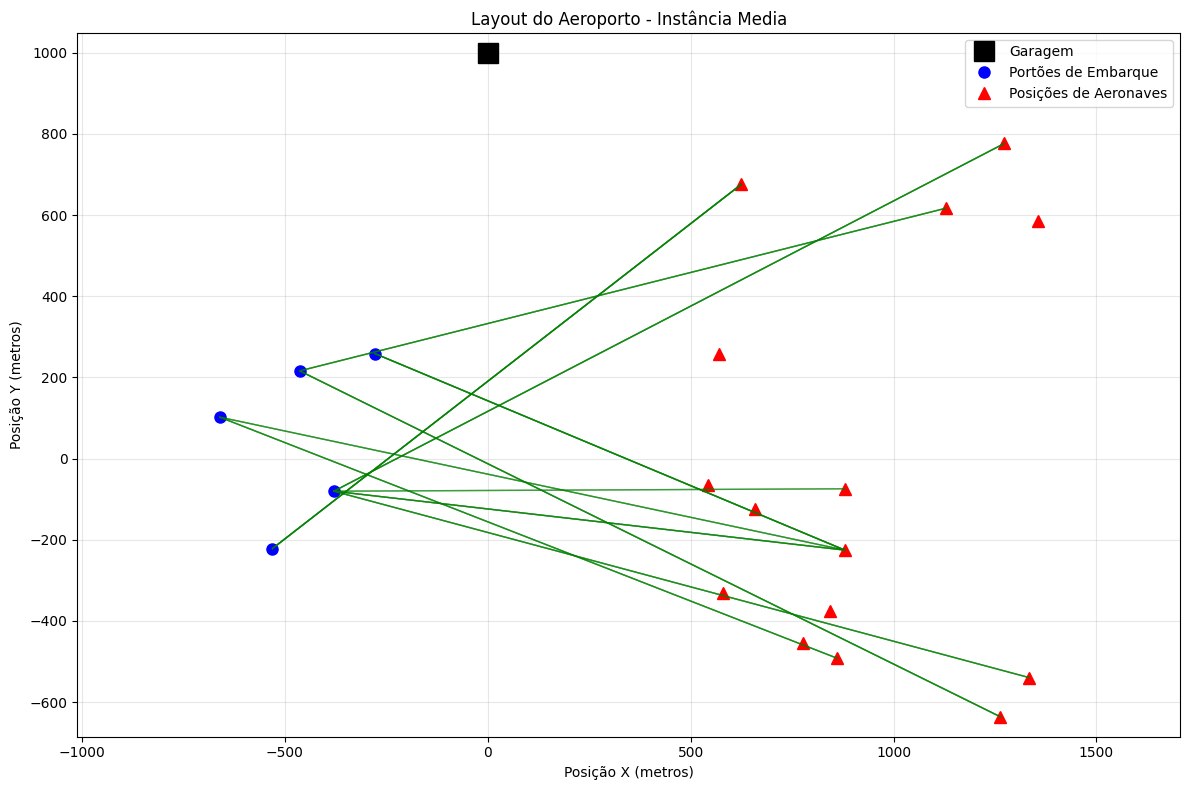

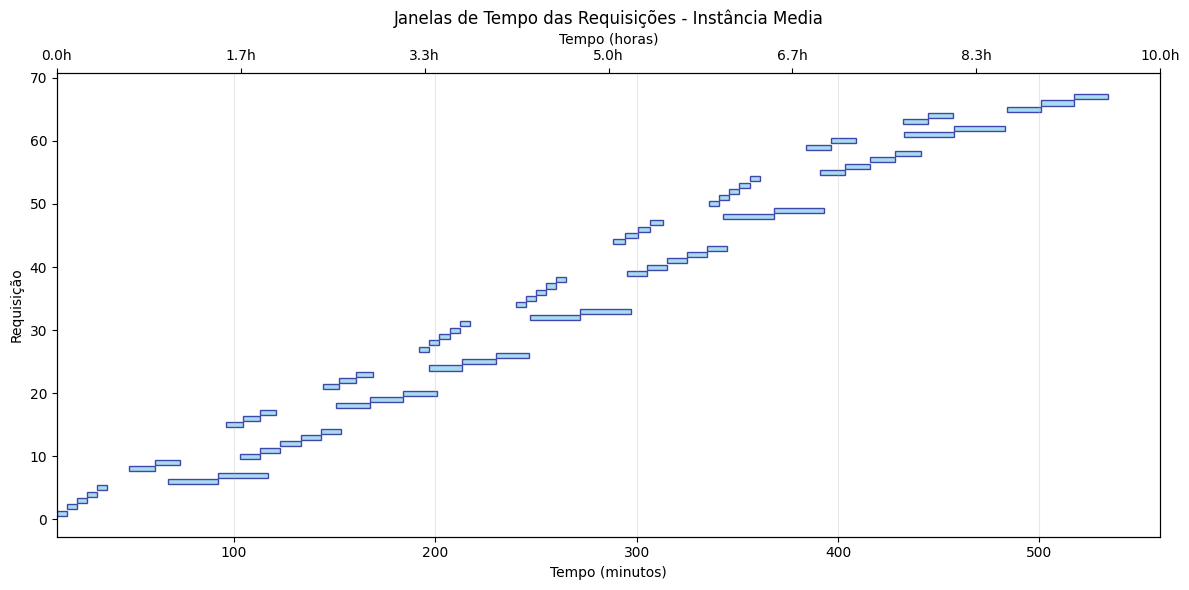

In [48]:
# Define a instância de tamanho médio para análise
instancia = 'media'

# Constrói o caminho para o arquivo de dados
arquivo = f'./dados/{instancia}.json'

# Carrega e processa os dados da instância média
dados = carregar_instancia(arquivo)

# Executa análise estatística e exibe métricas comparativas
analise = analisar_instancia(dados, instancia)

# Visualiza o layout do aeroporto para a instância média
# Permite comparar a complexidade espacial com outras instâncias
visualizar_layout_aeroporto(dados, instancia)

# Mostra a distribuição das janelas de tempo
# Fundamental para entender a pressão temporal das operações
visualizar_janelas_tempo(dados, instancia)

## 4. Análise da Instância "Grande"

A instância **grande** simula um cenário de alta demanda operacional com múltiplos voos simultâneos, cada um com suas fases de desembarque e embarque.

Esta instância é essencial para:
- Avaliar a escalabilidade da solução
- Testar o desempenho computacional do solver
- Analisar conflitos temporais entre múltiplas operações
- Validar a capacidade da frota de ônibus em horários de pico


=== ANÁLISE DA INSTÂNCIA: GRANDE ===
Número de requisições: 108
Número de ônibus: 11
Máximo de viagens por ônibus: 10
Capacidade total de viagens: 110
Utilização estimada: 98.2%
Tempo máximo por viagem: 60.0 min

Número de voos: 15
Passageiros em desembarque: 2896
Passageiros em embarque: 2411
Total de passageiros: 5307
Requisições de desembarque: 59
Requisições de embarque: 49
Média de passageiros por voo (desembarque): 193.1
Média de passageiros por voo (embarque): 160.7
Tempo médio de turnaround: 29.2 min
Janela de tempo mais cedo: 12.0 min
Janela de tempo mais tarde: 777.0 min
Duração total da operação: 765.0 min
Distância média entre requisições: 2703.86m
Distância máxima entre requisições: 4203.97m
Distância mínima entre requisições: 893.63m
Tempo de serviço médio: 5.42 min
Tempo de reabastecimento (garagem): 10.00 min

Número de requisições: 108
Número de ônibus: 11
Máximo de viagens por ônibus: 10
Capacidade total de viagens: 110
Utilização estimada: 98.2%
Tempo máximo por via

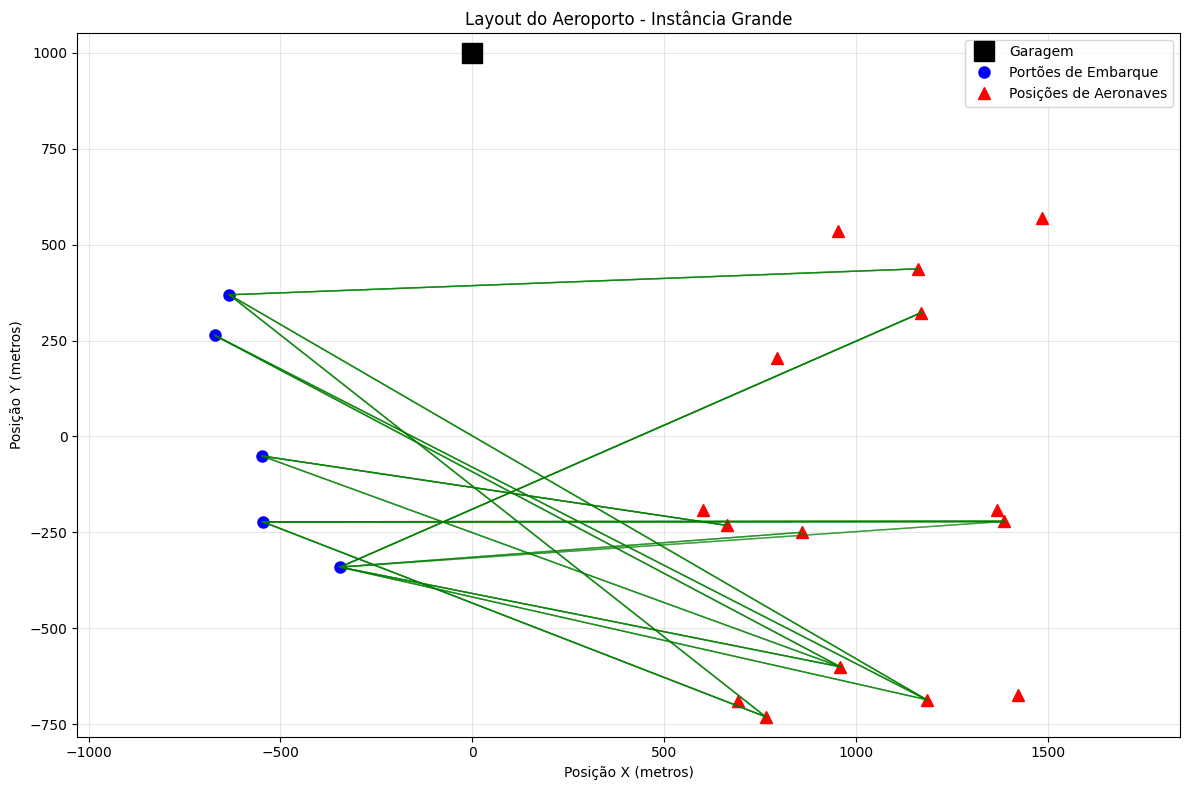

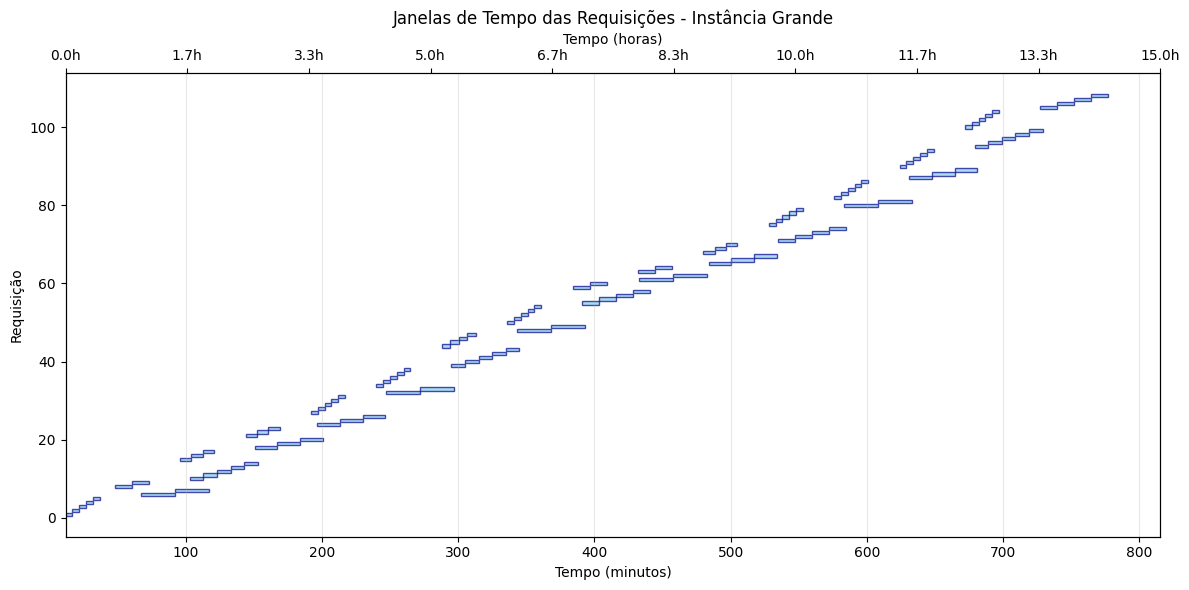

In [49]:
# Seleciona a instância de maior complexidade
instancia = 'grande'

# Define o caminho para os dados da instância grande
arquivo = f'./dados/{instancia}.json'

# Carrega os dados da instância mais complexa
dados = carregar_instancia(arquivo)

# Realiza análise detalhada da instância de grande porte
# Importante para avaliar escalabilidade do problema
analise = analisar_instancia(dados, instancia)

# Visualiza o layout complexo do aeroporto de grande porte
# Mostra a distribuição espacial em cenário realista
visualizar_layout_aeroporto(dados, instancia)

# Exibe as janelas de tempo para alta demanda
# Revela padrões temporais em operações intensivas
visualizar_janelas_tempo(dados, instancia)

## 5. Análise da Instância "Rush"

A instância **rush** simula um período de pico operacional do aeroporto, caracterizada por uma alta concentração de voos com suas operações de desembarque e embarque em janelas de tempo reduzidas (manhã ou noite).

Esta instância é crítica para:
- Testar o sistema sob pressão temporal extrema
- Avaliar a capacidade de coordenação de múltiplos voos simultâneos
- Identificar gargalos na transição desembarque → turnaround → embarque
- Validar estratégias de priorização de requisições
- Analisar a utilização máxima da frota de ônibus


=== ANÁLISE DA INSTÂNCIA: RUSH ===
Número de requisições: 108
Número de ônibus: 11
Máximo de viagens por ônibus: 10
Capacidade total de viagens: 110
Utilização estimada: 98.2%
Tempo máximo por viagem: 60.0 min

Número de voos: 15
Passageiros em desembarque: 2896
Passageiros em embarque: 2411
Total de passageiros: 5307
Requisições de desembarque: 59
Requisições de embarque: 49
Média de passageiros por voo (desembarque): 193.1
Média de passageiros por voo (embarque): 160.7
Tempo médio de turnaround: 29.2 min
Janela de tempo mais cedo: 12.0 min
Janela de tempo mais tarde: 441.0 min
Duração total da operação: 429.0 min
Distância média entre requisições: 2703.86m
Distância máxima entre requisições: 4203.97m
Distância mínima entre requisições: 893.63m
Tempo de serviço médio: 5.42 min
Tempo de reabastecimento (garagem): 10.00 min


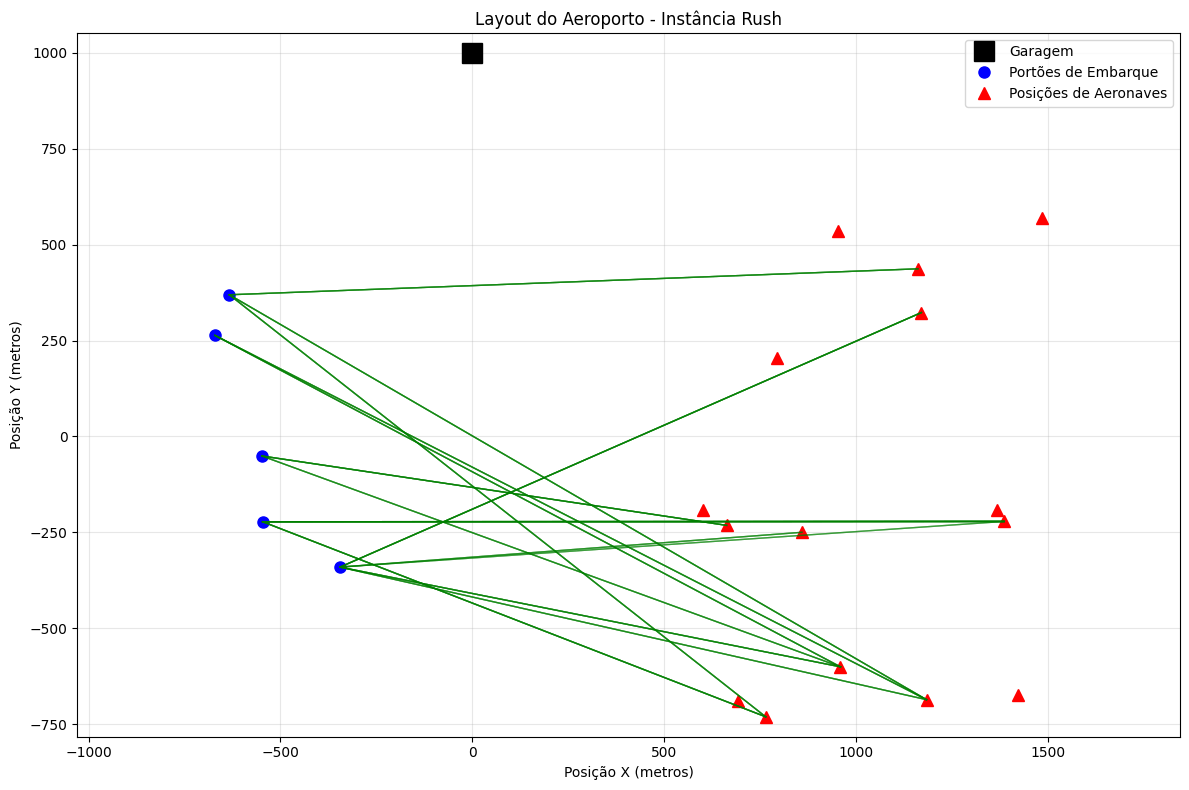

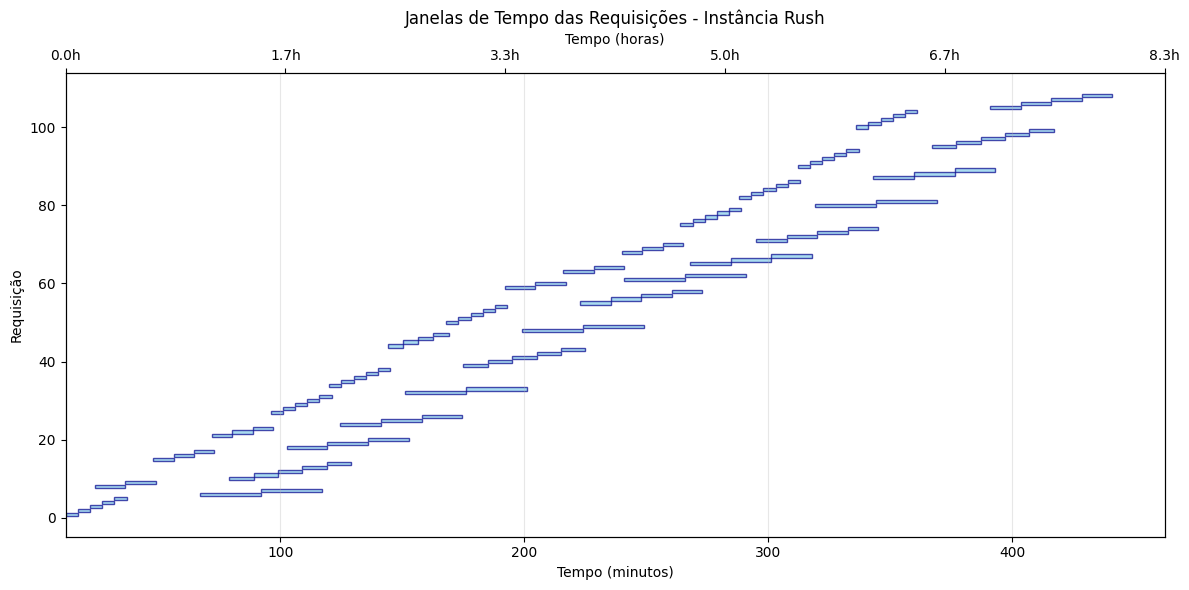

In [50]:
# Seleciona a instância de período de pico (rush)
instancia = 'rush'

# Define o caminho para os dados do cenário de rush
arquivo = f'./dados/{instancia}.json'

# Carrega os dados do período de alta demanda
dados = carregar_instancia(arquivo)

# Analisa as características do período de pico
# Foca em métricas de pressão temporal e eficiência
analise = analisar_instancia(dados, instancia)

# Visualiza o layout durante o período de rush
# Mostra a distribuição espacial sob alta demanda
visualizar_layout_aeroporto(dados, instancia)

# Exibe as janelas de tempo críticas do período de rush
# Revela a pressão temporal característica dos horários de pico
visualizar_janelas_tempo(dados, instancia)